In [49]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from diffusers.utils import load_image

pipeline = StableDiffusionPipeline.from_single_file("/data/sd_files/checkpoint/beautifulRealistic_v7.safetensors",
                                                   torch_dtype=torch.float16).to("cuda")
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter-plus-face_sd15.bin")

pipeline.set_ip_adapter_scale(0.5)
print('done')

done


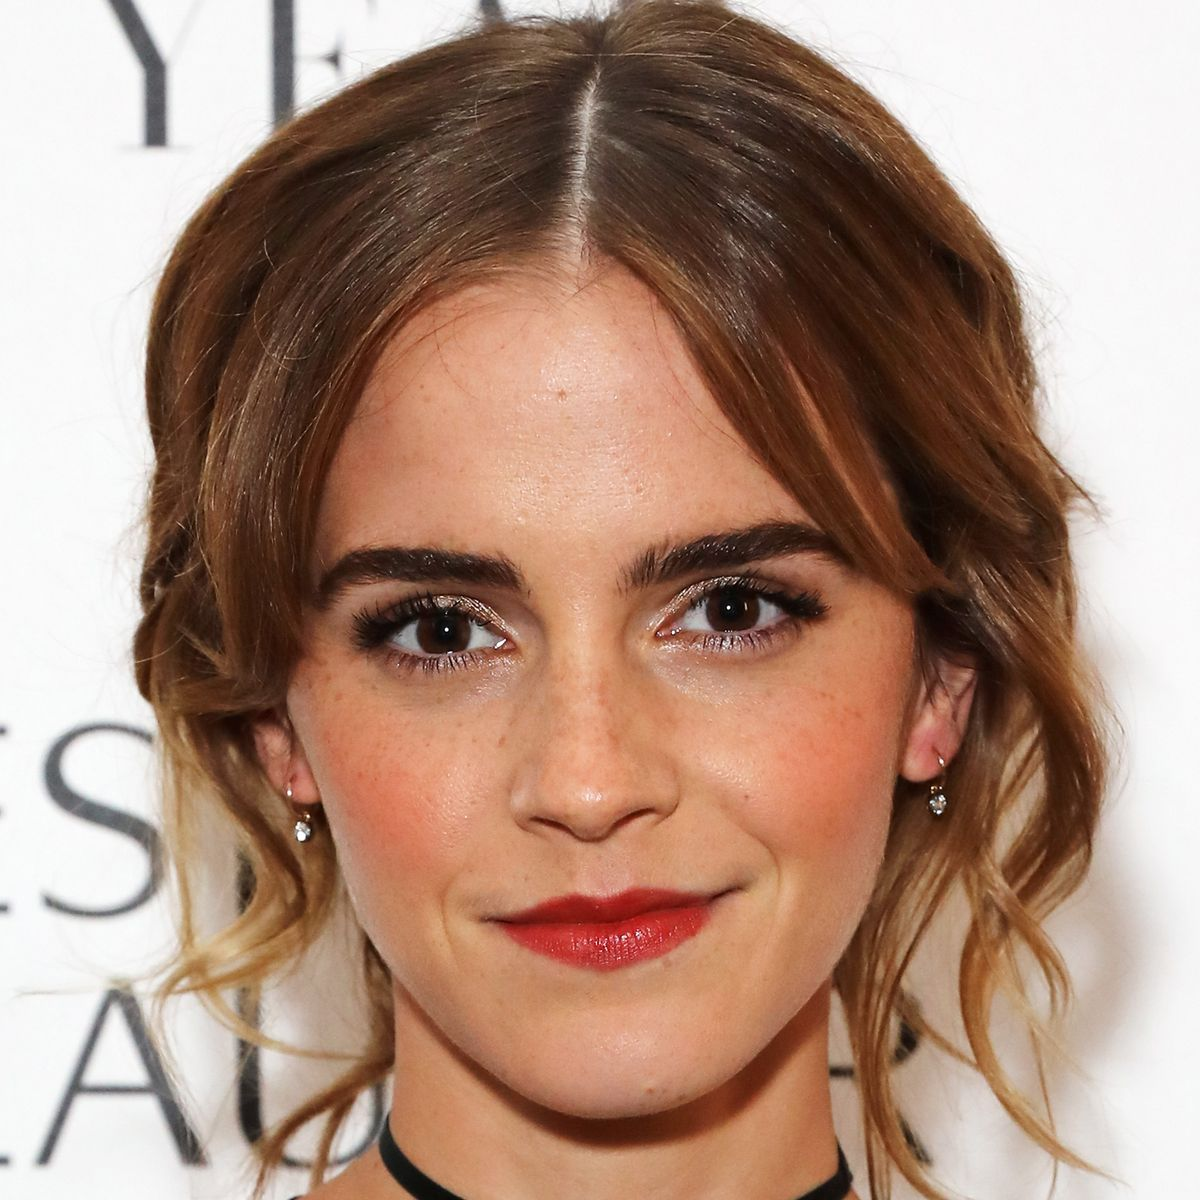

In [62]:
#image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ip_adapter_einstein_base.png")
#image = load_image("https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Tom_Cruise_by_Gage_Skidmore_2.jpg/440px-Tom_Cruise_by_Gage_Skidmore_2.jpg")
#image = load_image("https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Scarlett_Johansson_by_Gage_Skidmore_2019.jpg/1200px-Scarlett_Johansson_by_Gage_Skidmore_2019.jpg")
image = load_image("https://hips.hearstapps.com/hmg-prod/images/Emma-Watson_GettyImages-619546914.jpg?resize=1200:*")

image

In [ ]:
gen_image = pipeline(
    prompt="A photo of human as a chef, wearing an apron, cooking in a French restaurant",
    ip_adapter_image=image,
    negative_prompt="lowres, bad anatomy, worst quality, low quality",
    num_inference_steps=20,
).images[0]
gen_image

  0%|          | 0/20 [00:00<?, ?it/s]